In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

base= automap_base()

# reflect the tables

base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()



['measurement', 'station']

In [7]:
# Save references to each table

measurement = base.classes.measurement

station = base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session= Session(engine)


In [9]:
inspector= inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
measurement_columns= inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
station_columns= inspector.get_columns('station')
for column in station_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

session.query(measurement.id, measurement.station, func.max(measurement.date), measurement.prcp, measurement.tobs).all()



[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)]

In [13]:
#confirm most recent date with a second method
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [48]:
#save most recent date to a variable
soonest = session.query(measurement.id, measurement.station, func.max(measurement.date), measurement.prcp, measurement.tobs).all()
soonest_date= soonest[0][2]
soonest_date

'2017-08-23'

In [49]:
soonest_date= dt.datetime.strptime(soonest_date,'%Y-%m-%d')


In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


##calculate year ago
year_ago= soonest_date - dt.timedelta(days=365)
year_ago= year_ago.strftime('%Y-%m-%d')
year_ago

'2016-08-23'

In [18]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).\
                        filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

    
temp_data= [{"Date": result[2], "Station": result[1], "Precipitation": result[3], "TOBs": result[4]} for result in results]

df= pd.DataFrame(temp_data).set_index("Date")
df

,Station,Precipitation,TOBs
Date,,,
2016-08-23,USC00519397,0.00,81.0
2016-08-24,USC00519397,0.08,79.0
2016-08-25,USC00519397,0.08,80.0
2016-08-26,USC00519397,0.00,79.0
2016-08-27,USC00519397,0.00,77.0
...,...,...,...
2017-08-19,USC00516128,0.09,71.0
2017-08-20,USC00516128,NaN,78.0
2017-08-21,USC00516128,0.56,76.0


In [19]:
# Sort the dataframe by date

df= df.sort_values(by='Date', ascending= True )
df.head()



,Station,Precipitation,TOBs
Date,,,
2016-08-23,USC00519397,0.00,81.0
2016-08-23,USC00517948,NaN,80.0
2016-08-23,USC00519281,1.79,77.0
2016-08-23,USC00514830,0.05,80.0
2016-08-23,USC00513117,0.15,76.0


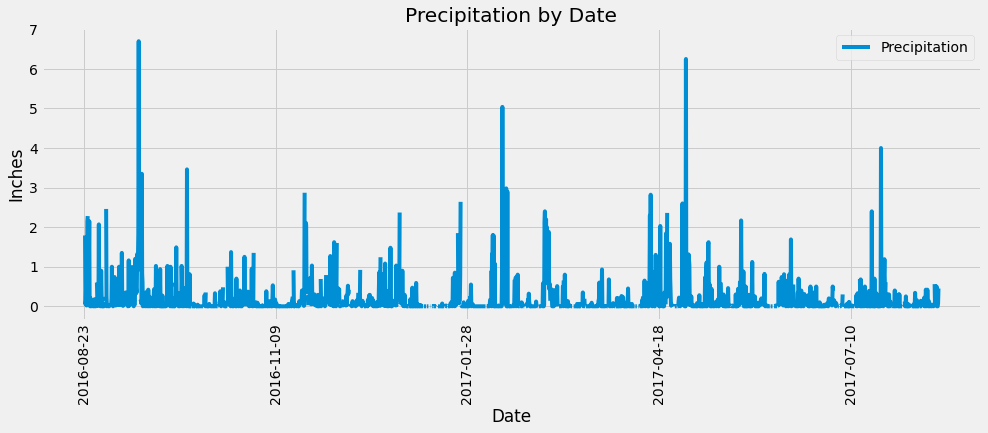

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

plot= df.plot.line(y="Precipitation", ylabel="Inches", rot=90, title= "Precipitation by Date", grid=True, figsize= (15,5),
                      use_index= True)

plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()


,Precipitation,TOBs
count,2021.000000,2230.000000
mean,0.177279,74.590583
std,0.461190,4.611667
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset


total= session.query(func.count(station.id)).all()

total


[(9,)]

In [23]:
station_columns= inspector.get_columns('station')
for column in station_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [52]:

station_results= session.query(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation)

station_data=[{"Id": result[0], "Station":result[1], "Name": result[2], "lat":result[3], "long":result[4], "elevation":result[5]} for result in station_results]

station_df= pd.DataFrame(station_data).set_index('Id')

station_df

,Station,Name,lat,long,elevation
Id,,,,,
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [25]:
#SQLalchemy version
#Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_activity= session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station)\
        .order_by(func.count(measurement.date).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
#Pandas version
#Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

results_all = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).all()

all_temp_data= [{"Date": result[2], "Station": result[1], "Precipitation": result[3], "TOBs": result[4]} for result in results_all]

df_all= pd.DataFrame(all_temp_data)


activity= df_all.groupby('Station').count()
activity= activity.sort_values('Date', ascending=False)
activity= activity["Date"]
activity

Station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: Date, dtype: int64

In [27]:
#station with the highest number of observations

max_observation=  session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station)\
        .order_by(func.count(measurement.date).desc()).first()

print(max_observation)


('USC00519281', 2772)


In [28]:
measurement_columns= inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_max= session.query(measurement.station, func.max(measurement.tobs)).filter(measurement.station == max_observation[0]).all()

most_active_min= session.query(measurement.station, func.min(measurement.tobs)).filter(measurement.station == max_observation[0]).all()

most_active_avg= session.query(measurement.station, func.avg(measurement.tobs)).filter(measurement.station == max_observation[0]).all()

print(f'The maximum temperature at the most active station is: {most_active_max[0][1]}',"\n")
print(f'The minimum temperature at the most active station is: {most_active_min[0][1]}', "\n")
print(f'The average temperature at the most active station is: {round(most_active_avg[0][1],2)}', "\n")





The maximum temperature at the most active station is: 85.0 

The minimum temperature at the most active station is: 54.0 

The average temperature at the most active station is: 71.66 



In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


station_results = session.query(measurement.station, measurement.tobs).\
                        filter(measurement.date >= year_ago).filter(measurement.station == most_active_min[0][0]).all()

# temp_data= [{"Date": result[2], "Station": result[1], "Precipitation": result[3], "TOBs": result[4]} for result in results]
temp_list= [result[1] for result in station_results]


[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 53., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

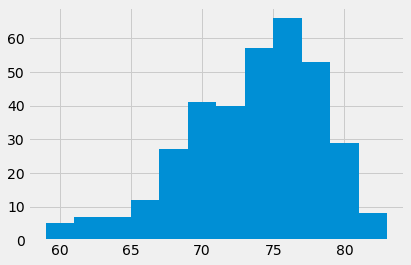

In [39]:
#plot histogram
plt.hist(temp_list, bins=12)

# Close session

In [40]:
# Close Session
session.close()